In [1]:
import os
import time
import random
import collections

import gym
from gym import wrappers
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [4]:
from ddpg import DDPG
from td3 import TD3

In [5]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

def live_plot(data_dict, figsize=(15,5)):

    clear_output(wait=True)
    plt.figure(figsize=figsize)
    
    for label, data in data_dict.items():
        plt.plot(data, label=label)
    
    plt.legend(loc='lower left')
    plt.show();
    

---

##### Environment

In [13]:
env_name = 'LunarLanderContinuous-v2'
save_models = True
seed = 13

##### Initialize environment and set seeds

In [14]:
env = gym.make(env_name)

env.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

In [15]:
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
max_action = float(env.action_space.high[0])

##### Choose saved model

In [16]:
os.listdir('./pytorch_models')

['all_ddpg',
 'all_td3',
 'DDPG_LunarLanderContinuous-v2_202_actor.pth',
 'DDPG_LunarLanderContinuous-v2_202_critic.pth',
 'TD3_LunarLanderContinuous-v2_100_actor.pth',
 'TD3_LunarLanderContinuous-v2_100_critic_1.pth',
 'TD3_LunarLanderContinuous-v2_100_critic_2.pth']

In [23]:
file_name = (
    'TD3_LunarLanderContinuous-v2_100'
    #'DDPG_LunarLanderContinuous-v2_202'
)

file_name

'TD3_LunarLanderContinuous-v2_100'

##### Initialize agent

In [24]:
try:
    agent = TD3(state_dim, action_dim, max_action)
    agent.load(file_name, './pytorch_models')
    print('TD3')
except:
    agent = DDPG(state_dim, action_dim, max_action)
    agent.load(file_name, './pytorch_models')
    print('DDPG')

TD3


##### Define testing parameters

In [25]:
max_steps = 1000
episodes = 10
report = 1

reward_trace = collections.defaultdict(list)

##### Testing:

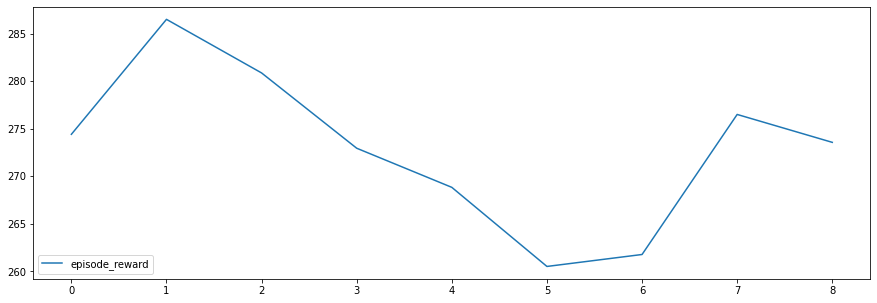

Episode: 9
Average score: 273.5612382730547


In [26]:
for episode in np.arange(1, episodes):
    
    obs = env.reset()
    done = False
    episode_reward = []
    steps = 0
    

    
    while not done:

        action = agent.select_action(np.array(obs))
        obs, reward, done, info = env.step(action)

        done = (done) or (steps >= max_steps)
        
        steps += 1
        episode_reward.append(reward)

        env.render()
        
    
    
    reward_trace['episode_reward'].append(sum(episode_reward))

    live_plot(reward_trace)
 
    if episode % report == 0:
        
        print('Episode:', episode)
        print('Average score:', np.mean(reward_trace['episode_reward'][-report:]))
        time.sleep(1.5)
 

---

In [2]:
df = pd.read_csv('performance.csv')

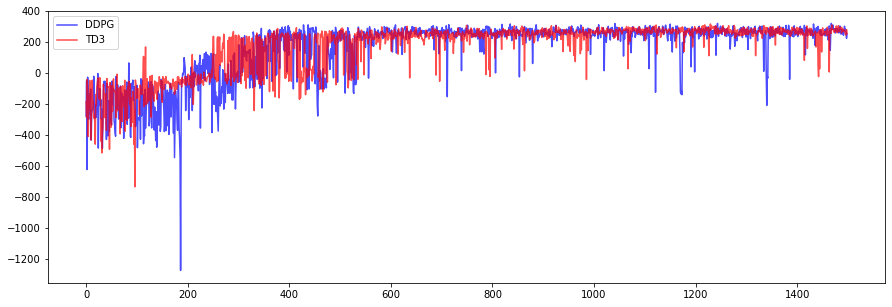

In [8]:
plt.figure(figsize=(15,5))

plt.plot(df['ddpg'], 'b', label='DDPG', alpha=0.7)
plt.plot(df['td3'], 'r', label='TD3', alpha=0.7)
plt.legend()

plt.show()

In [9]:
df.loc[600:].sum()

ddpg    229543.752133
td3     230293.552612
dtype: float64

In [10]:
df.loc[600:].mean()

ddpg    255.332316
td3     256.166354
dtype: float64